# Sales Prediction

#### ( Simple Linear Regression)

### Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

### Data

Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

### Reading and Understanding the Data

In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
advertising = pd.DataFrame(pd.read_csv("Advertising.csv"))
advertising.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# deleting column 1 'Unnamed: 0'
del advertising['Unnamed: 0']

In [4]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Data Inspection

In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Data Cleaning

<AxesSubplot:>

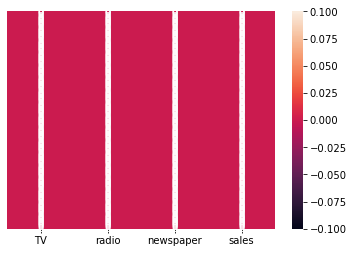

In [8]:
sns.heatmap(advertising.isnull(),annot=True,yticklabels=False)

In [9]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

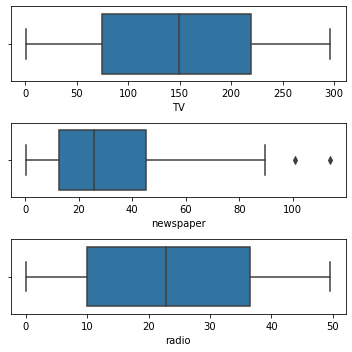

In [10]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data.

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

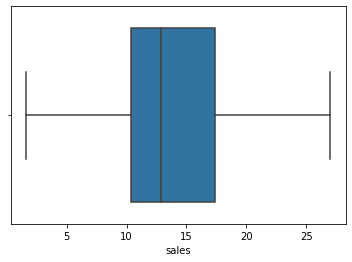

In [11]:
sns.boxplot(advertising['sales'])
plt.show()

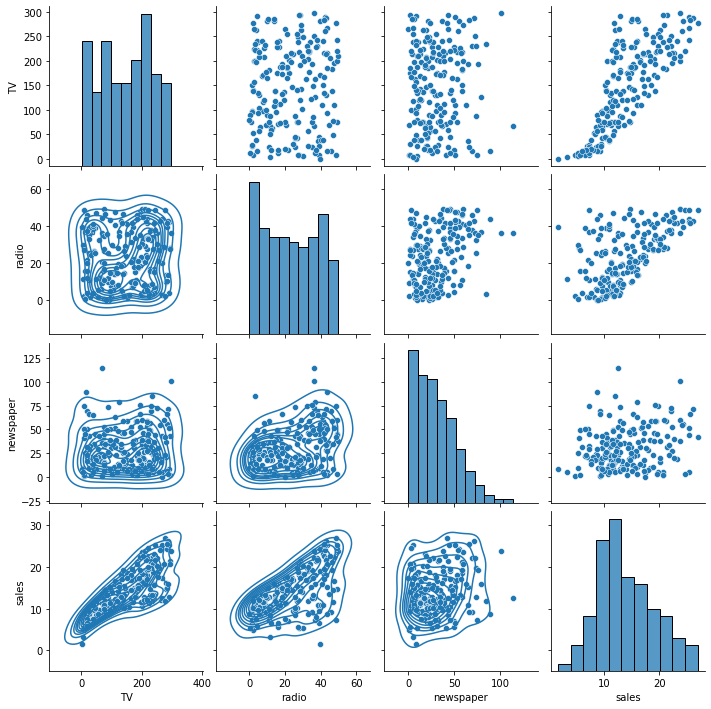

In [12]:
p=sns.pairplot(advertising)
p.map_upper(plt.scatter)
p.map_diag(sns.distplot)
p.map_lower(sns.kdeplot)

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>]], dtype=object)

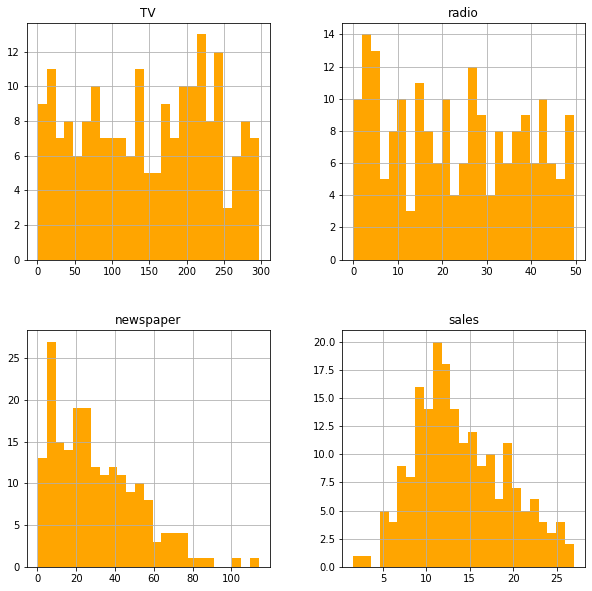

In [14]:
advertising.hist(bins=25,figsize=(10,10),color='orange')

In [15]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


positive Correlation Coefficients signify that the two variables being compared have a perfect positive relationship

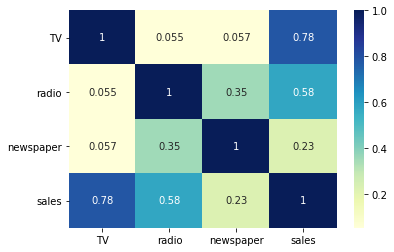

In [16]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales.

### Lets Check if there are any outlier present in the dataset

In [20]:
from scipy import stats
colnames = ['TV','radio','newspaper']
X1 = advertising.iloc[:,:-1]
y=data_target=advertising.iloc[:,-1]

In [21]:
X2 = pd.concat([X1,data_target],axis=1)
X2

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [22]:
import numpy as np
zscore = np.abs(stats.zscore(X2[colnames]))
outlierlist = np.where((zscore >3))
print(outlierlist)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [23]:
X3 = X2.drop(outlierlist[0],axis=0)
print(X3)
X3.shape

        TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[198 rows x 4 columns]


(198, 4)

After removing outliers from the dataset we have new data shape (198,4)

## Model Building

#### Performing Simple Linear Regression

Equation of linear regression

y=c+m1x1+m2x2+...+mnxn 

* y  is the response
* c  is the intercept
* m1  is the coefficient for the first feature
* mn  is the coefficient for the nth feature

In our case:

y=c+m1×TV 
The m values are called the model *coefficients* or *model parameters*.

In [24]:
#Determine the Features and labels:

X = X3.iloc[:,:-1]
y = X3.iloc[:,-1]

In [25]:
#Split the Dataset to Train & Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#assigning 30 percents of data to test data for evaluating the model

In [26]:
#Train the Model

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
pd.DataFrame(model.coef_ , X.columns ,columns=['coefcient'])

#these codes returns a DataFaram of coeficents

,coefcient
TV,0.046031
radio,0.190064
newspaper,-0.004064


In [27]:
#predicting Test Data
y_pred= model.predict(X_test)
y_pred

array([15.03081718, 18.35971703, 24.89274078, 10.06621121,  8.57024151,
       21.79464665, 17.75305333,  9.89991661,  6.14317174,  8.53096891,
       14.03552556,  7.6757919 , 18.29989617, 17.18898518,  9.73479305,
       21.32336817, 17.14841768,  9.93840323, 13.5712221 , 15.11793201,
        8.2569251 , 12.14902292, 15.43552176,  8.1760812 , 14.11836297,
        7.65981064, 11.57548049, 12.25644867, 10.52137967, 19.32395159,
       14.74519463, 16.63695486, 16.45374799, 19.04836936, 18.43492188,
       13.45116188, 10.39062969, 21.2763183 , 23.27539699,  4.48986638,
       10.1054664 ,  7.80734826,  8.78083271, 14.2677113 , 16.87274064,
       18.81420299, 13.16022778, 20.86800022, 12.35701962,  8.88645328,
        9.7316364 , 12.62746118,  5.39267814, 15.66437694,  7.87147116,
        7.66359235,  8.88795152,  6.86578629, 24.14199346,  6.67670169])

In [28]:
#Evaluating the Model
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test , y_pred)
MSE=metrics.mean_squared_error(y_test , y_pred)
RMSE=np.sqrt(MSE)
a=pd.DataFrame([MAE,MSE,RMSE], index=['MAE','MSE','RMSE'],columns=['Quantity'])
a

,Quantity
MAE,1.386576
MSE,2.884416
RMSE,1.698357


Text(0.5, 1.0, 'bias of y')

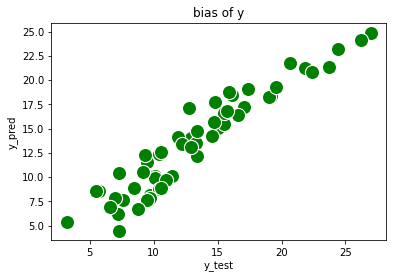

In [29]:
#Residuals:
test_residual=y_test-y_pred
sns.scatterplot(x=y_test,y=y_pred,color='green' ,s=200)
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.title('bias of y')

#### Generic Steps in model building using statsmodels

We first assign the feature variable, *TV*, in this case, to the variable *X* and the response variable, *Sales*, to the variable *y*.

In [30]:
X = X3['TV']
y = X3['sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing *train_test_split* from the *sklearn.model_selection* library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
# Let's now take a look at the train dataset

X_train.head()

75      16.9
3      151.5
185    205.0
27     240.1
91      28.6
Name: TV, dtype: float64

In [33]:
y_train.head()

75      8.7
3      18.5
185    22.6
27     15.9
91      7.3
Name: sales, dtype: float64

#### Building a Linear Model

You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [48]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [49]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [50]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    7.340601
TV       0.044467
dtype: float64

In [51]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     170.4
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           9.31e-26
Time:                        23:47:44   Log-Likelihood:                -364.13
No. Observations:                 138   AIC:                             732.3
Df Residuals:                     136   BIC:                             738.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3406      0.595     12.334      0.0

#### Looking at some key statistics from the summary

The values we are concerned with are -

1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

1. **The coefficient for TV is 0.044, with a very low p value**. 

The coefficient is statistically significant. So the association is not purely by chance.

2. **R - squared is 0.556**

Meaning that 55.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. **F statistic has a very low p value (practically low)**

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

**---------------------------------------------------------------------------------------------------------------------------**

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

***Sales=7.340+0.044×TV***

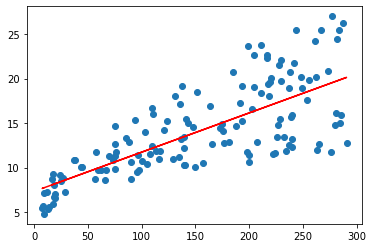

In [52]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.340 + 0.044*X_train, 'r')
plt.show()

### Model Evaluation

#### Residual analysis

To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [53]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

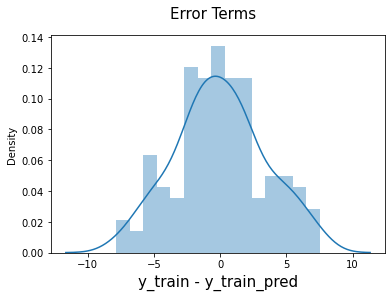

In [54]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

*The residuals are following the normally distributed with a mean 0. All good!*

#### Looking for patterns in the residuals

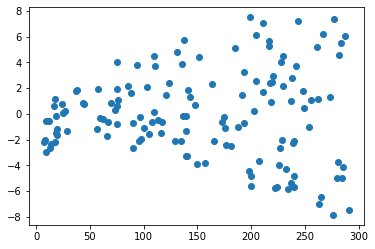

In [55]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data



### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the **X_test** data like you did for **X_train** and then you can simply go on and predict the y values corresponding to **X_test** using the **predict** attribute of the fitted regression line.

In [56]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [57]:
y_pred.head()

128    17.136612
106     8.452268
100    17.229992
93     18.497293
113    16.660819
dtype: float64

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Looking at the RMSE

In [59]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.951638236131853

***Checking the R-squared on the test set***

In [60]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7003088489397418

### Visualizing the fit on the test set

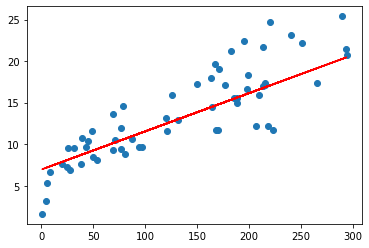

In [61]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.046 * X_test, 'r')
plt.show()

## Model Saving

In [63]:
# Saving and Loading the Model
import pickle
filename = 'Advertising.pkl'
pickle.dump(model, open(filename, 'wb'))